# supp-2: 심슨의 역설 (2)

최규빈  
2023-10-15

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/06wk-supp.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-xAatJ9BdzK2ASQnPRmvO8J&si=-64H-NnvEw_bMBTd>

# 2. Imports

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

# 3. 심슨의 역설 – 이어서

`-` 버클리대학교의 입학데이터

-   <https://github.com/guebin/DV2023/blob/main/posts/ds.pdf>

`-` 주장: 버클리대학에 gender bias가 존재한다.

-   1973년 가을학기의 입학통계에 따르면 지원하는 남성이 여성보다 훨씬
    많이 합격했고, 그 차이가 너무 커서 우연의 일치라 보기 어렵다.

In [36]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1)
df

## A. 시각화1: 전체합격률 시각화 – pandas 초보

## B. 시각화1: 전체합격률 시각화 – pandas 고수

/tmp/ipykernel_1831005/1840989269.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

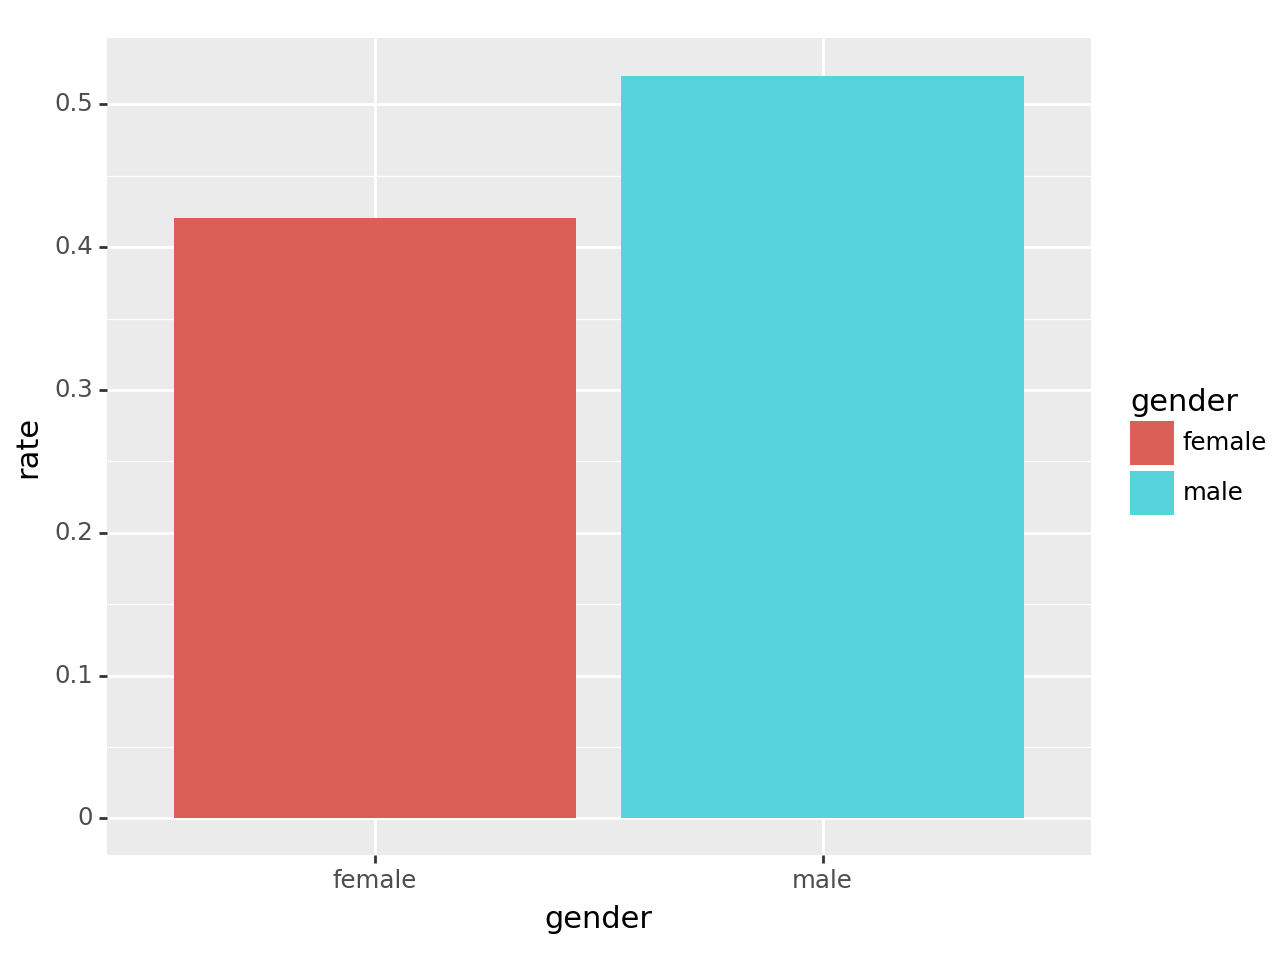

In [37]:
tidydata = df.pivot_table(index='gender', columns='result', values='count', aggfunc=sum)\
.assign(rate = lambda _df: _df['pass'] / (_df['fail'] + _df['pass']))\
.reset_index()

fig = ggplot(tidydata) 
col = geom_col(aes(x='gender',y='rate',fill='gender'))
fig + col 

## C. 시각화2: 학과별합격률 시각화 – pandas 고수

In [48]:
df.pivot_table(index=['gender','department'], columns='result',values='count',aggfunc=sum)\
.assign(rate = lambda _df: _df['pass']/(_df['fail']+_df['pass']))\
.reset_index()

/tmp/ipykernel_1831005/1491763288.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/tmp/ipykernel_1831005/2462720722.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

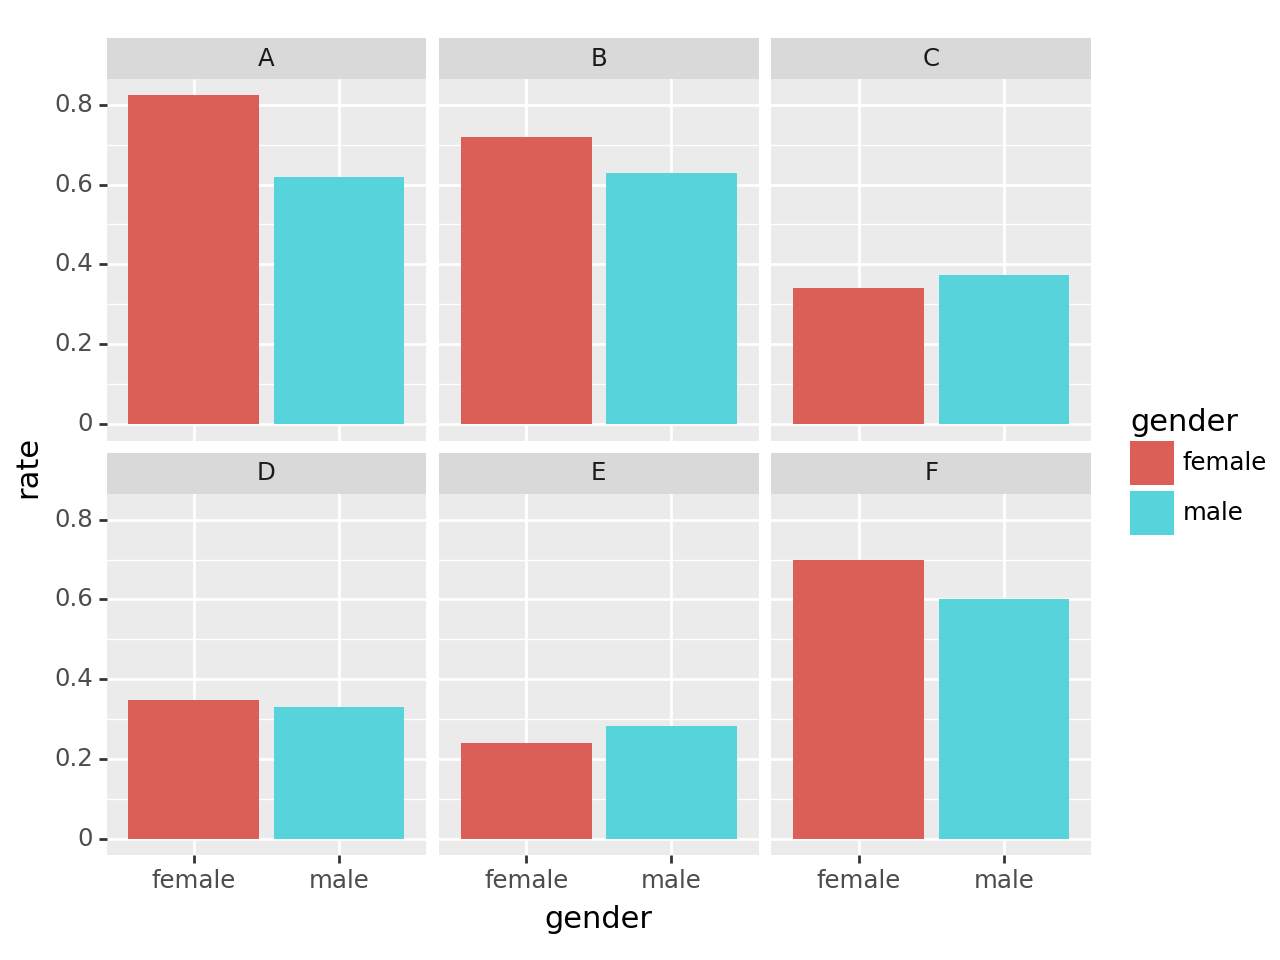

In [50]:
tidydata = df.pivot_table(index=['gender','department'], columns='result',values='count',aggfunc=sum)\
.assign(rate = lambda _df: _df['pass']/(_df['fail']+_df['pass']))\
.reset_index()

fig = ggplot(tidydata) 
facet = facet_wrap('department')
col = geom_col(aes(x='gender',y='rate',fill='gender'))
fig + facet + col 

## D. 해석

`-` 시각화1: 남자의 합격률이 더 높다. $\to$ 성차별이 있어보인다(?)

`-` 시각화2: 학과별로 살펴보니 오히려 A,B,F,D의 경우 여성의 합격률이
높다.

`-` 교재에서 설명한 이유: 여성이 합격률이 낮은 학과에만 많이 지원하였기
때문

In [68]:
df.pivot_table(index='department', columns='gender', values='count',aggfunc='sum')\
.stack().reset_index().rename({0:'count'},axis=1)

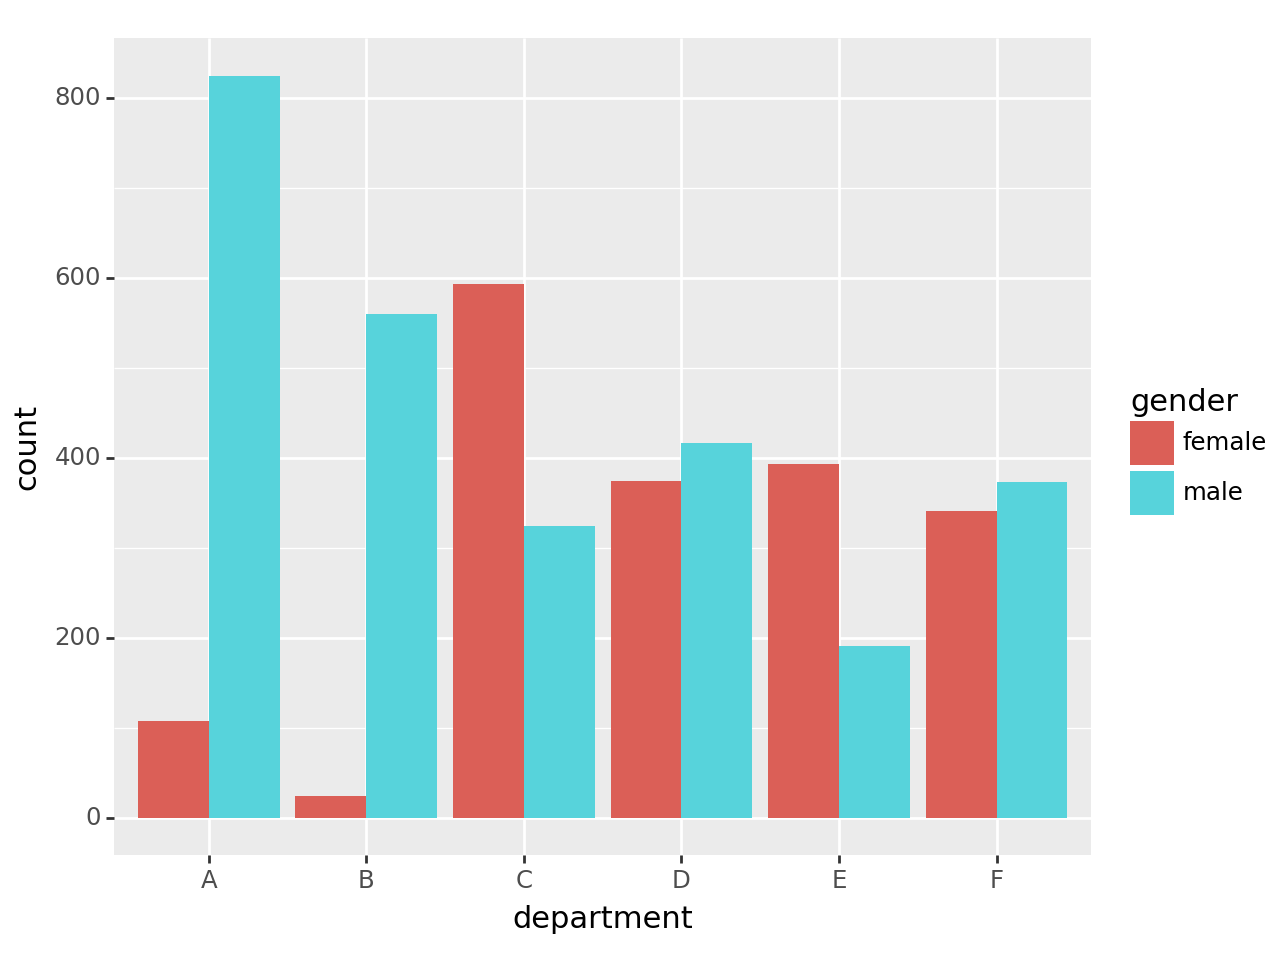

In [72]:
tidydata = df.pivot_table(index='department', columns='gender', values='count',aggfunc='sum')\
.stack().reset_index().rename({0:'count'},axis=1)

 
fig = ggplot(tidydata) 
col = geom_col(aes(x='department',y='count',fill='gender'),position='dodge')
fig+col

# 4. HW

In [73]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson2.csv")
df

`-` 시각화1: 성별합격률 시각화

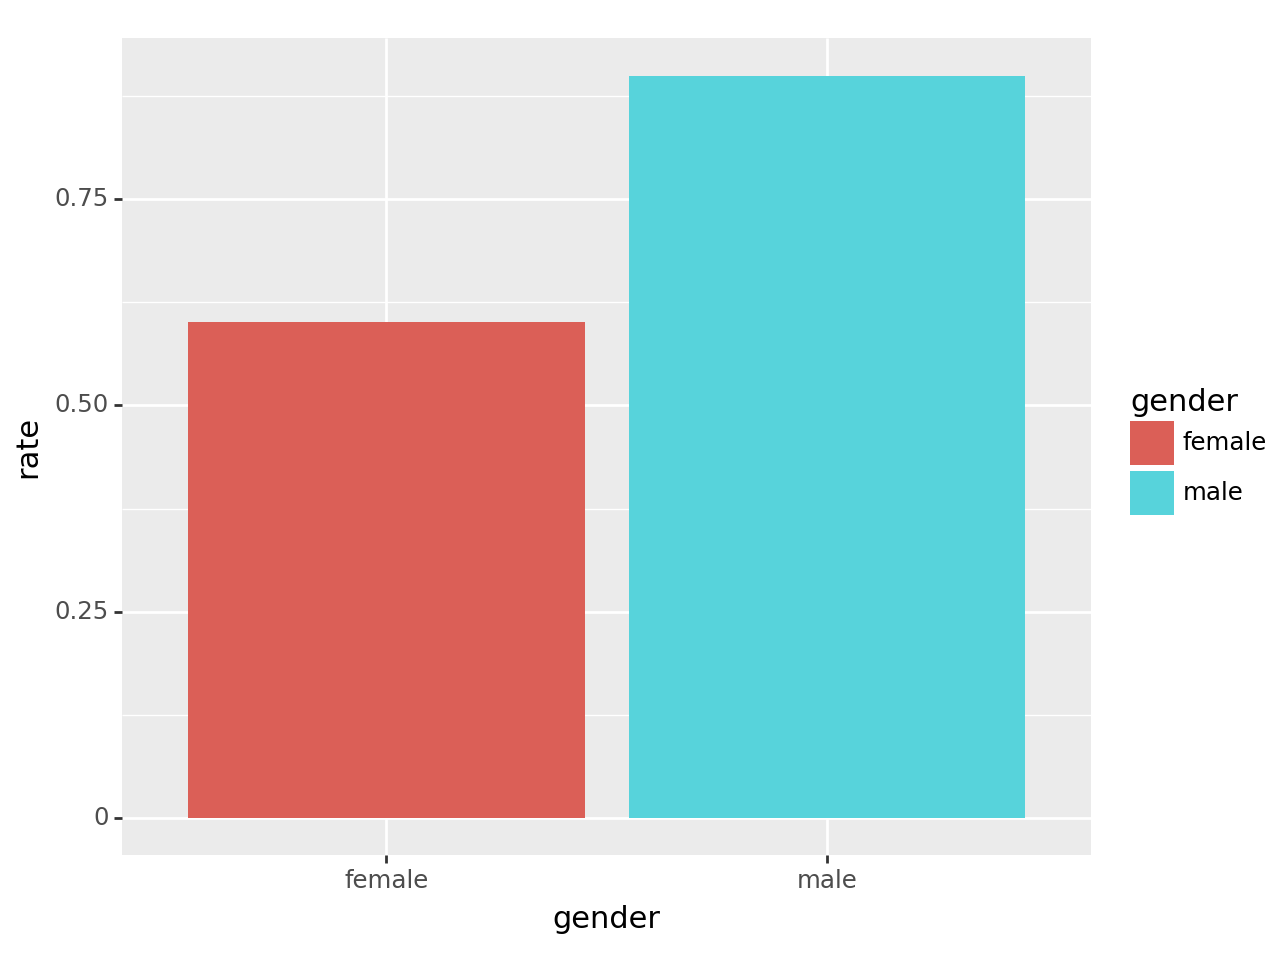

In [21]:
# 시각화예시

`-` 시각화2: (학과,성별) 합격률 시각화

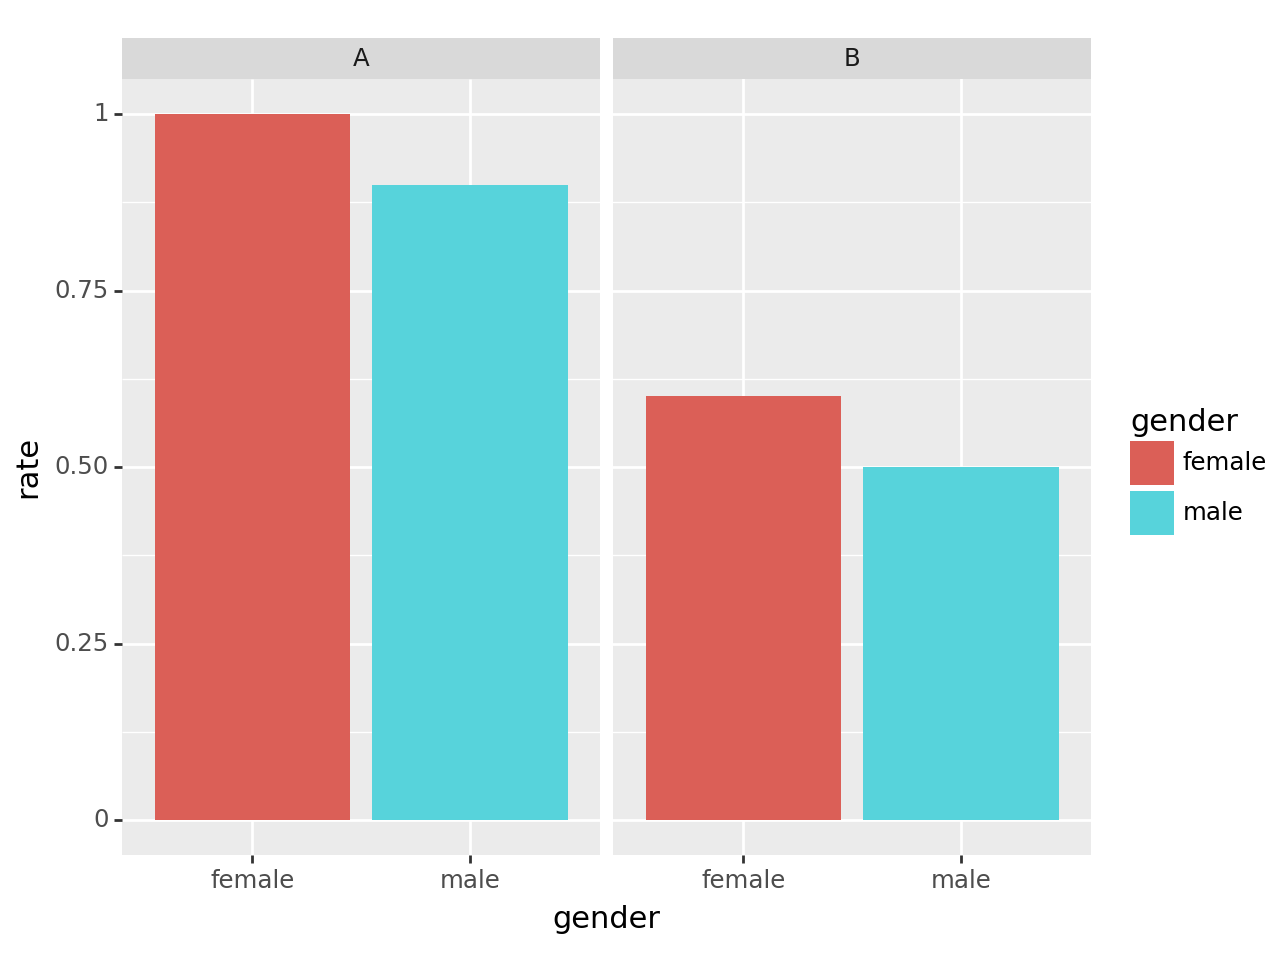

In [35]:
# 시각화예시